# 1) Entendimiento del negocion

## Datos Sensores Ambientales Árboles Solares - Municipio Ibagué
 * El dataset proviene de sensores instalados en distintas zonas/barrios de la ciudad de ibague que registran variables ambientales como temperatura, humedad, ruido, CO₂, NO₂, watts y nivel de polución (ICA).

 * Desde la perspectiva del negocio o del problema, el interés principal está en apoyar la gestión ambiental urbana, detectar zonas críticas de contaminación y evaluar la eficiencia energética de los árboles solares. Este tipo de información es esencial para que las autoridades municipales tomen decisiones informadas sobre planeación urbana sostenible, ubicación estratégica de nuevas zonas verdes
## Proposito del dataset 
* El propósito del conjunto de datos es permitir un análisis integral de las condiciones ambientales de Ibagué, para identificar patrones, comportamientos y relaciones entre los distintos factores que afectan la calidad del aire y el entorno urbano.

# 2) Comprension de los datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ruta_dataset = "DATOS_SENSORES_AMBIENTALES_ARBOLES_SOLARES-MUNICIPIO_IBAGUE_20251028.xlsx"
ds = pd.read_excel(ruta_dataset)
print("Dataset cargado correctamente. # Filas # Columnas")
print(ds.shape)
ds.head()

Dataset cargado correctamente. # Filas # Columnas
(100557, 9)


,Zona / Corregimiento,Fecha,Temperatura (°),Polución (ICA),Humedad (%),Ruido (dB),CO2 (PPM),NO2 (PPM),Watts (Vatio)
0,Arbol Solar Parque Villa Restrepo,9/01/2023 18:53,21.0,50.7,78,25,701,0.1,0.0
1,Arbol Solar Parque Villa Restrepo,9/01/2023 18:53,21.0,50.7,78,25,701,0.1,0.0
2,Arbol Solar Parque Villa Restrepo,9/01/2023 18:53,21.0,50.7,78,25,701,0.1,0.0
3,Arbol Solar Parque Villa Restrepo,9/01/2023 18:53,21.0,50.7,78,25,701,0.1,0.0
4,Arbol Solar Parque Villa Restrepo,9/01/2023 18:53,21.0,50.7,78,25,701,0.1,0.0


* El dataset cuenta con 100557 datos y 9 caracteristicas relacionadas a los indicadores ambientales

In [3]:
print(ds.dtypes)

Zona / Corregimiento     object
Fecha                    object
Temperatura (°)         float64
Polución (ICA)          float64
Humedad (%)               int64
Ruido (dB)                int64
CO2 (PPM)                 int64
NO2 (PPM)               float64
Watts (Vatio)           float64
dtype: object


* Segun lo visto a los 5 primeros registros podemos observar que se conforma por la zona donde se encuentra el sensor ambiental , la fecha y hora que se tomo el dato y el numero representativo de los indicadores ambientales
## ¿Como interpretar los datos?
* Temperatura: Valores bajos: ambiente más frío. || Valores altos: ambiente más caliente.
* Polucion (ICA): Más bajo = mejor calidad del aire. || Más alto = más contaminación.
* Ruido: Más bajo: ambiente más silencioso. ||Más alto = más ruido (posible contaminación sonora).
* CO2: Más bajo = aire más limpio. || Más alto = aire más cargado o menos ventilado.
* NO2: Más bajo = aire más limpio. || Más alto = contaminación atmosférica más severa.
* Watts (Vatio): Más alto = mayor generación de energía solar. || Más bajo = menos energía (nublado, noche o fallo).

In [4]:
print(ds.describe())

       Temperatura (°)  Polución (ICA)    Humedad (%)     Ruido (dB)  \
count    100557.000000   100557.000000  100557.000000  100557.000000   
mean         24.948731       15.556352      64.907336      45.906511   
std           5.079885       20.601604      17.789451      44.895694   
min           0.000000       -1.410000       0.000000       0.000000   
25%          21.000000        2.140000      57.000000      25.000000   
50%          24.000000       10.900000      71.000000      41.000000   
75%          28.000000       17.010000      77.000000      42.000000   
max         244.000000      143.200000      99.000000     230.000000   

           CO2 (PPM)      NO2 (PPM)  Watts (Vatio)  
count  100557.000000  100557.000000  100556.000000  
mean      394.564386       0.019942      29.326308  
std       191.969500       0.031095      29.560633  
min         0.000000      -0.020000       0.000000  
25%       274.000000       0.000000       0.000000  
50%       419.000000       0.0100

* Valor de temperatura irreal el maximo fue de 244 grados quizas fue un error de medicion del sensor pero es importante limpiarlo para entrenar el modelo y que no exista errores 

In [5]:
print(ds.nunique())

Zona / Corregimiento        4
Fecha                   47358
Temperatura (°)            40
Polución (ICA)           2439
Humedad (%)                99
Ruido (dB)                158
CO2 (PPM)                 952
NO2 (PPM)                  14
Watts (Vatio)            1227
dtype: int64


In [6]:
print(ds.isnull().sum())

Zona / Corregimiento    0
Fecha                   0
Temperatura (°)         0
Polución (ICA)          0
Humedad (%)             0
Ruido (dB)              0
CO2 (PPM)               0
NO2 (PPM)               0
Watts (Vatio)           1
dtype: int64


* Watts tiene un dato vacio

                 Temperatura (°)  Polución (ICA)  Humedad (%)  Ruido (dB)  \
Temperatura (°)         1.000000       -0.136792    -0.546161    0.098139   
Polución (ICA)         -0.136792        1.000000     0.269009   -0.100414   
Humedad (%)            -0.546161        0.269009     1.000000    0.072031   
Ruido (dB)              0.098139       -0.100414     0.072031    1.000000   
CO2 (PPM)              -0.284962        0.869549     0.528906   -0.125799   
NO2 (PPM)              -0.097663        0.893227     0.318860    0.004546   
Watts (Vatio)          -0.162545        0.042454     0.262696   -0.036239   

                 CO2 (PPM)  NO2 (PPM)  Watts (Vatio)  
Temperatura (°)  -0.284962  -0.097663      -0.162545  
Polución (ICA)    0.869549   0.893227       0.042454  
Humedad (%)       0.528906   0.318860       0.262696  
Ruido (dB)       -0.125799   0.004546      -0.036239  
CO2 (PPM)         1.000000   0.817001       0.143284  
NO2 (PPM)         0.817001   1.000000      -0.024004 

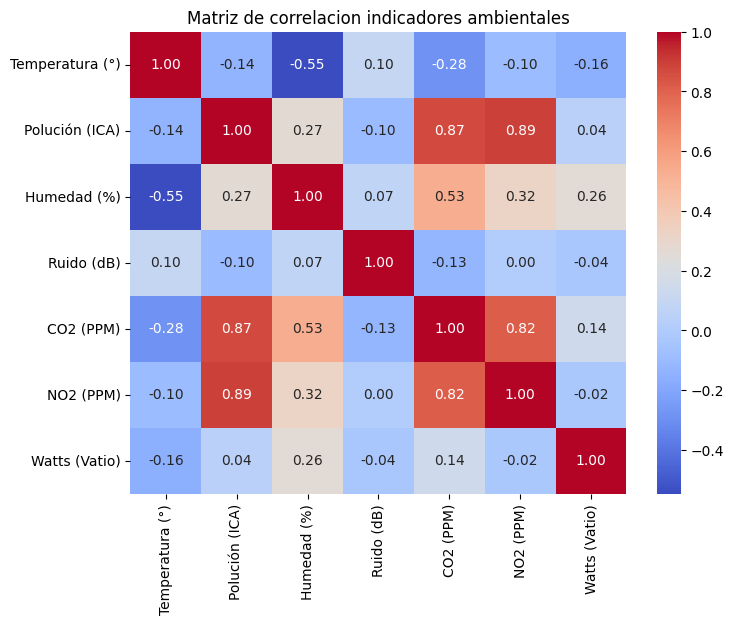

In [7]:
matrizCorrelacion = ds.corr(numeric_only=True)
print (matrizCorrelacion)

plt.figure(figsize=(8,6))
sns.heatmap(matrizCorrelacion, annot= True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlacion indicadores ambientales")
plt.show()

## Correlacion de los datos
* La variable a pedecir es la calidad del aire y el CO2 (Dioxido de carbono) y el NO2 (Dioxido de carbono) tienen una relacion directa, por lo que es importante prestar atencion en estos para la prediccion
* Las caracteristicas como temperatura y humedad ayudan a mejorar la prediccion aunque no tenga relaciones fuertes se relaciona con el CO2 que es la caracteristica 1 de las 2 caracteristicas mas influyentes a nuestra variable de prediccion 
* Los Watts representan la energia solar generada por el panel, por lo que no tiene relacion directa con la contaminacion y el ruido no influye en nignuna otra variable por lo que estas son independientes de las otras

In [8]:
promedioZona = ds.groupby('Zona / Corregimiento')['Polución (ICA)'].mean().sort_values()
print(promedioZona)

Zona / Corregimiento
Arbol Solar Skate Park               -0.469237
Arbol Solar Parque Ricaurte           2.848844
Arbol Solar Parque Villa Restrepo    11.783494
Arbol Solar Juntas                   21.004988
Name: Polución (ICA), dtype: float64


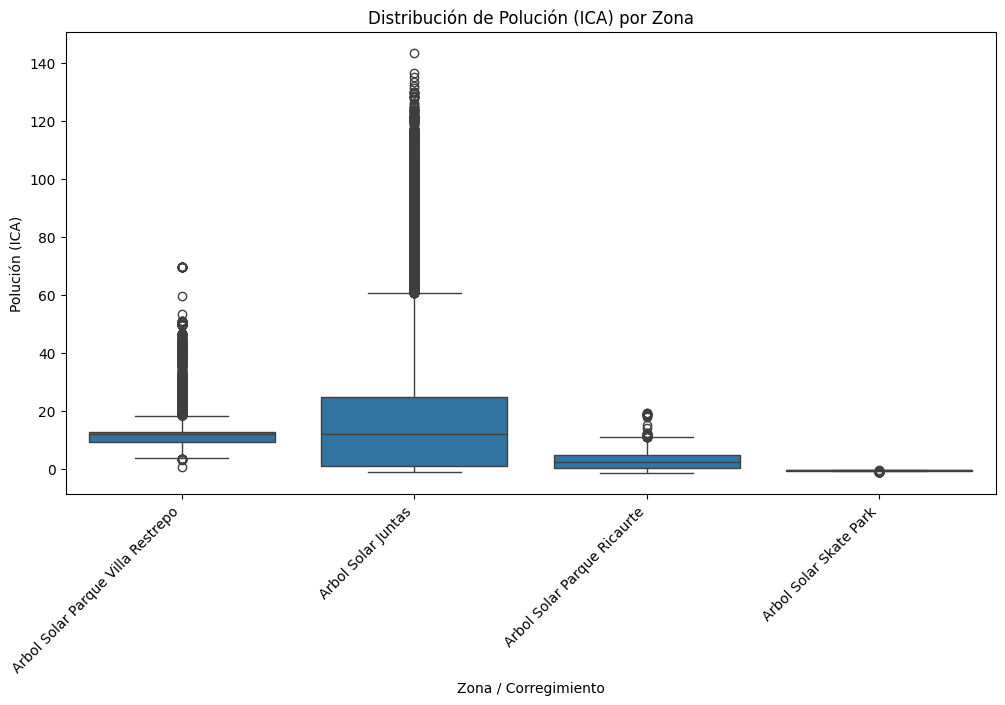

In [9]:
# Convertir Polución (ICA) a numérico (forzando errores a NaN)
ds['Polución (ICA)'] = pd.to_numeric(ds['Polución (ICA)'], errors='coerce')

# Ahora hacemos el boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Zona / Corregimiento', y='Polución (ICA)', data=ds)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Polución (ICA) por Zona')
plt.xlabel('Zona / Corregimiento')
plt.ylabel('Polución (ICA)')
plt.show()


* Entre mas alto sean las cajas y los bigotes significa que son zonas que presentan mayor contaminacion del aire
* Hay variaciones episodios donde se presentan picos de contaminacion mas elevados fuera de lo normal quizas por factores externos a los indicadores ambientales
* Existen valores atipicos como en solar de juntas que llegan a los 144 de polucion lo que significa que es un valor irreal y un error de medicion por parte del sensor, es un dato que se tiene que considerar para la limpieza 

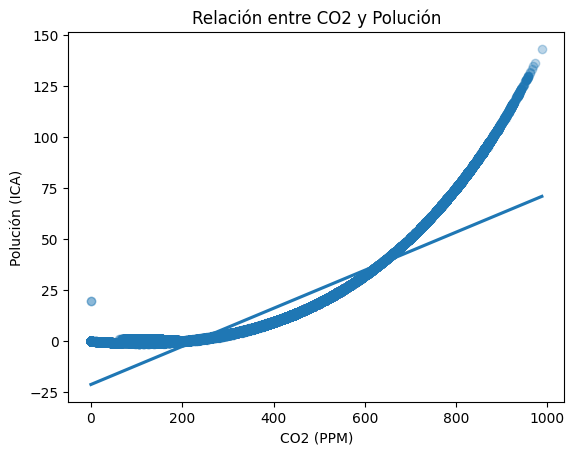

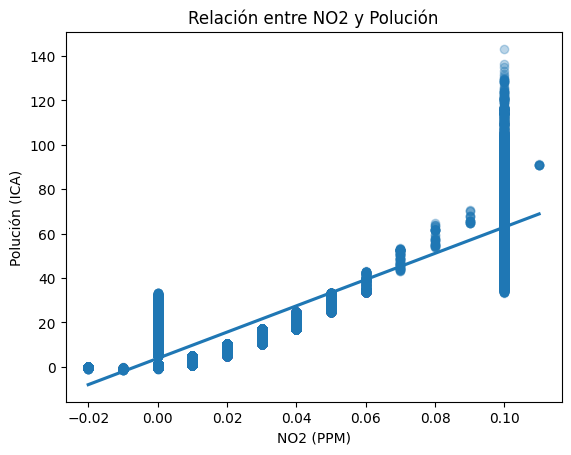

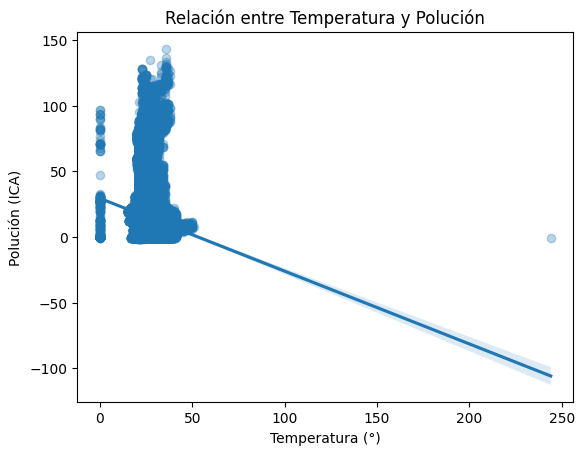

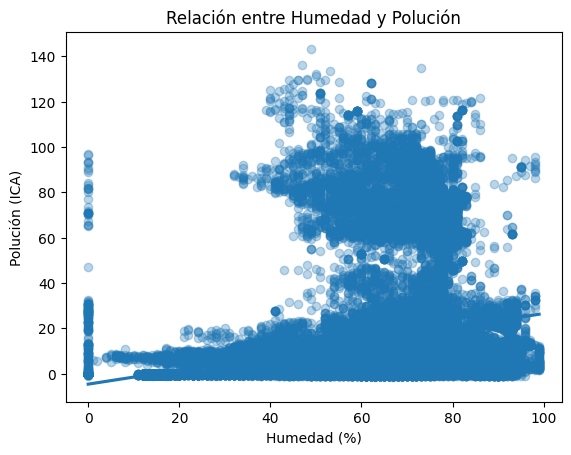

In [10]:
sns.regplot(x='CO2 (PPM)', y='Polución (ICA)', data=ds, scatter_kws={'alpha':0.3})
plt.title('Relación entre CO2 y Polución')
plt.show()

sns.regplot(x='NO2 (PPM)', y='Polución (ICA)', data=ds, scatter_kws={'alpha':0.3})
plt.title('Relación entre NO2 y Polución')
plt.show()

sns.regplot(x='Temperatura (°)', y='Polución (ICA)', data=ds, scatter_kws={'alpha':0.3})
plt.title('Relación entre Temperatura y Polución')
plt.show()

sns.regplot(x='Humedad (%)', y='Polución (ICA)', data=ds, scatter_kws={'alpha':0.3})
plt.title('Relación entre Humedad y Polución')
plt.show()

### CO2 vs Polucion
* Relacion no lineal
* La policion aumenta de manera constante a medida que el dioxido de carbono aumenta 
### NO2 vs Polucion
* Relacion lineal positiva
* A medida que aumenta el dioxido de nitrogeno tambien aumenta la policion 
### Temperatura vs Policion
* La mayoria de los datos se encuentran de 0 a 50 
* No hay un patron claro 
* No tiene una relacion directa con la policion 
### Humedad vs Polucion 
* La humedad en relacion a la polucion por si sola no explica los cambios en la calidad del aire 
* Actua de forma indirecta sobre la polucion 

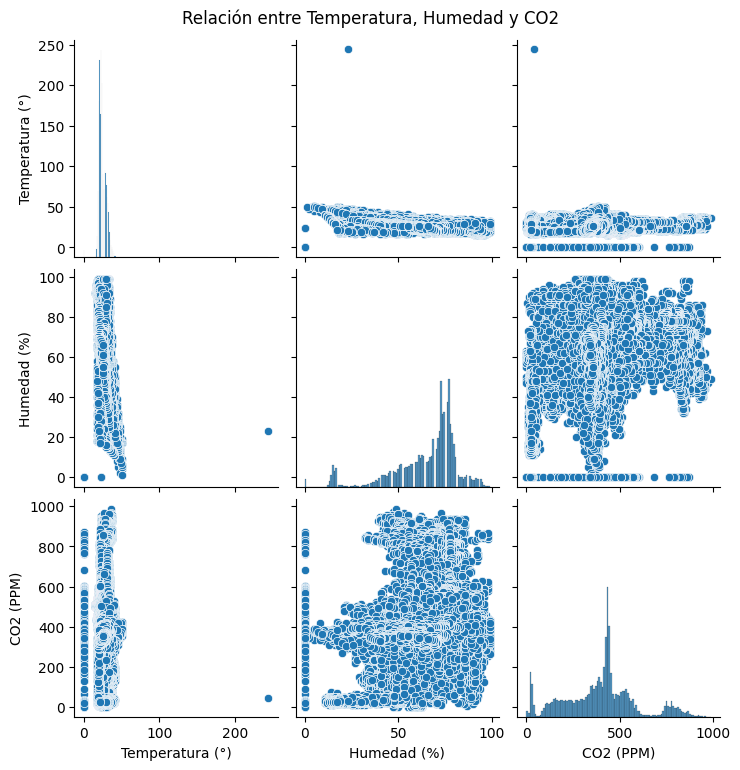

In [11]:
sns.pairplot(ds[['Temperatura (°)', 'Humedad (%)', 'CO2 (PPM)']])
plt.suptitle('Relación entre Temperatura, Humedad y CO2', y=1.02)
plt.show()


### Diagrama de pares para determinar como influye la temperatura y humedad con la policion 
* Se concluyo de que la temperatura y humedad influyen de manera indirecta con la calidad del aire
* La temperatura se relaciona con el CO2
    * La humedad se relaciona con la temperatura 
    * A medida que la temperatura sube la humedad baja (2,1)
    * Alta humedad se asocia a una mayor concentracion de CO2 (3,2)
    * Si tenemos una temperatura baja entonces aumenta la humedad, y si hay mucha humedad hay mayor concentracion de CO2 
    ### CONCLUSION SIMPLE
    * Si hay baja temperatura habra mayor humedad y si hay mayor humedad hay mayor concentracion de CO2 

## Hipotesis segun el entendimiento de los datos y EDA
* Las zonas con mayores emiciones de CO2 y NO2 presentan mayor nivel de polucion, independientemente del ruido y la energia solar que el sensor calcula
* La temperatura y humedad influyen en la contaminacion del aire pero no de manera directa
* Existen una alta desviacion en los niveles de contaminacion que quizas se deban a factores externos de los indicadores ambientales 

## Consideraciones a tener en cuenta para el preprocesamiento 
### Revisar los valores atipicos e irreales 
* La polucion mayor a 140  (error de medicion)
* Temperatura valor maximo de 244 (error de medicion)
* Valor nulo en watts
* Polucion en negativo (errores de medicion, no es posible que la concentracion de un contaminante sea negativa) 
* NO2 en negativo (error de medicion, no es posible que la concentracion de un contaminante sea negativa)
* El dato de la fecha y hora no es relevante para nuestra variable de prediccion

# 3) Preparacion de los datos

## Importante crear una copia de la original para no dañarla y trabajar en esa

In [43]:
ruta_dataset = "DATOS_SENSORES_AMBIENTALES_ARBOLES_SOLARES-MUNICIPIO_IBAGUE_20251028.xlsx"
ds = pd.read_excel(ruta_dataset)

In [44]:
dsProcesar = ds.copy()

print("Copia")
print(dsProcesar.shape)
print("Original")
print(ds.shape)

Copia
(100557, 9)
Original
(100557, 9)


## Valor nulo en watts

In [45]:
print(dsProcesar.isnull().sum())

Zona / Corregimiento    0
Fecha                   0
Temperatura (°)         0
Polución (ICA)          0
Humedad (%)             0
Ruido (dB)              0
CO2 (PPM)               0
NO2 (PPM)               0
Watts (Vatio)           1
dtype: int64


In [46]:
dsProcesar = dsProcesar.dropna()
print(dsProcesar.isnull().sum())

Zona / Corregimiento    0
Fecha                   0
Temperatura (°)         0
Polución (ICA)          0
Humedad (%)             0
Ruido (dB)              0
CO2 (PPM)               0
NO2 (PPM)               0
Watts (Vatio)           0
dtype: int64


## La polucion mayor a 140  (error de medicion)

In [47]:
dsProcesar[dsProcesar['Polución (ICA)'] > 140]

,Zona / Corregimiento,Fecha,Temperatura (°),Polución (ICA),Humedad (%),Ruido (dB),CO2 (PPM),NO2 (PPM),Watts (Vatio)
3894,Arbol Solar Juntas,16/01/2023 15:55,36.0,143.2,49,41,988,0.1,38.3


In [48]:
dsProcesar = dsProcesar[dsProcesar['Polución (ICA)'] <= 140]

In [49]:
dsProcesar[dsProcesar['Polución (ICA)'] > 140]

,Zona / Corregimiento,Fecha,Temperatura (°),Polución (ICA),Humedad (%),Ruido (dB),CO2 (PPM),NO2 (PPM),Watts (Vatio)


## Temperatura valor maximo de 244 (error de medicion)

In [50]:
print(dsProcesar[dsProcesar['Temperatura (°)'] > 50])

              Zona / Corregimiento                  Fecha  Temperatura (°)  \
83406       Arbol Solar Skate Park  24 de octubre de 2024            244.0   
87528  Arbol Solar Parque Ricaurte    29 de enero de 2025             51.0   

       Polución (ICA)  Humedad (%)  Ruido (dB)  CO2 (PPM)  NO2 (PPM)  \
83406           -0.66           23          30         42      -0.02   
87528            7.90            5         227        383       0.02   

       Watts (Vatio)  
83406            0.0  
87528           39.0  


In [51]:
dsProcesar = dsProcesar[dsProcesar['Temperatura (°)'] <= 50]

In [52]:
print(dsProcesar['Temperatura (°)'].max())

50.0


In [53]:
dsProcesar[dsProcesar['Temperatura (°)'] > 50]

,Zona / Corregimiento,Fecha,Temperatura (°),Polución (ICA),Humedad (%),Ruido (dB),CO2 (PPM),NO2 (PPM),Watts (Vatio)


## Polucion en negativo

In [54]:
polucionNegativos = dsProcesar[dsProcesar['Polución (ICA)'] < 0].index
print("Filas con polución negativa:")
print(len(polucionNegativos))

Filas con polución negativa:
6934


In [55]:
dsProcesar = dsProcesar[dsProcesar['Polución (ICA)'] >= 0]

In [56]:
print(dsProcesar['Polución (ICA)'].min())

0.0


## NO2 en negativo

In [57]:
NO2Negativo = dsProcesar[dsProcesar['NO2 (PPM)'] < 0].index
print("Filas con NO2 negativo:")
print(list(NO2Negativo))
print(len(NO2Negativo))

Filas con NO2 negativo:
[]
0


## Se eliminaron en total 6938 datos de 100557 

In [58]:
print(dsProcesar.shape)

(93619, 9)


## Eliminar caracteristicas no influyentes como fecha y hora, ruido y watts

In [59]:
dsProcesar = dsProcesar.drop(['Fecha', 'Ruido (dB)', 'Watts (Vatio)'], axis=1)
print(dsProcesar.shape)
print("Columnas actuales:")
print(dsProcesar.columns)

(93619, 6)
Columnas actuales:
Index(['Zona / Corregimiento', 'Temperatura (°)', 'Polución (ICA)',
       'Humedad (%)', 'CO2 (PPM)', 'NO2 (PPM)'],
      dtype='object')


## 3.1) Homogenizar datos 

## Establecer intervalos de cada caracteristica en una escala categorica de 1 a 5 muy bajo, bajo, medio, alto, muy alto 
* Temperatura: Valores bajos: ambiente más frío. || Valores altos: ambiente más caliente.
* Polucion (ICA): Más bajo = mejor calidad del aire. || Más alto = más contaminación.
* CO2: Más bajo = aire más limpio. || Más alto = aire más cargado o menos ventilado.
* NO2: Más bajo = aire más limpio. || Más alto = contaminación atmosférica más severa.

## Generar los intervalos datos usando la formula ValMax-ValMin/5

In [60]:
dsProcesar.describe()

,Temperatura (°),Polución (ICA),Humedad (%),CO2 (PPM),NO2 (PPM)
count,93619.000000,93619.000000,93619.000000,93619.000000,93619.000000
mean,24.781887,16.745420,67.641750,420.192856,0.022700
std,4.981509,20.860573,13.948244,172.858150,0.030421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,4.230000,60.000000,320.000000,0.000000
50%,24.000000,11.540000,72.000000,427.000000,0.010000
75%,28.000000,18.310000,77.000000,496.000000,0.030000
max,50.000000,136.300000,99.000000,972.000000,0.110000


* Es importante tener en cuenta que la categoria 1 representa el nivel mas bajo por ende es la mejor condicion 
* la categoria 5 representa el nivel mas alto osea la peor condicion
* Por ende entre mas cerca los datos de los indicadores ambientales esten al 1 significa que las condiciones ambientales son optimas para una buena calidad del aire 

In [61]:
indicadoresAmbientales = ['Temperatura (°)', 'Polución (ICA)', 'Humedad (%)', 'CO2 (PPM)', 'NO2 (PPM)']
intervalos = {}
epsilon = 1e-3  

for indicador in indicadoresAmbientales: 
    minimo = dsProcesar[indicador].min()
    maximo = dsProcesar[indicador].max()
    amplitud = (maximo - minimo) / 5
    
    limites = [minimo + i * amplitud for i in range(6)]
    rangos = [(limites[i], limites[i+1] - epsilon) for i in range(5)]
    
    if indicador == 'Temperatura (°)':
        rangos.reverse()

    intervalos[indicador] = rangos

intervalosTemperatura = intervalos['Temperatura (°)']
intervalosPolucion = intervalos['Polución (ICA)']
intervalosHumedad = intervalos['Humedad (%)']
intervalosCo2 = intervalos['CO2 (PPM)']
intervalosNo2 = intervalos['NO2 (PPM)']

for indicador, rangos in intervalos.items():
    print(f"\n {indicador}")
    print("=" * 50)
    print(f"{'N°':<5} {'Límite inferior':<20} {'Límite superior'}")
    print("-" * 50)
    for i, (inf, sup) in enumerate(rangos, 1):
        print(f"{i:<5} {inf:<20} {sup}")



 Temperatura (°)
N°    Límite inferior      Límite superior
--------------------------------------------------
1     40.0                 49.999
2     30.0                 39.999
3     20.0                 29.999
4     10.0                 19.999
5     0.0                  9.999

 Polución (ICA)
N°    Límite inferior      Límite superior
--------------------------------------------------
1     0.0                  27.259
2     27.26                54.519000000000005
3     54.52                81.779
4     81.78                109.039
5     109.04               136.299

 Humedad (%)
N°    Límite inferior      Límite superior
--------------------------------------------------
1     0.0                  19.799
2     19.8                 39.599000000000004
3     39.6                 59.39900000000001
4     59.400000000000006   79.199
5     79.2                 98.999

 CO2 (PPM)
N°    Límite inferior      Límite superior
--------------------------------------------------
1     0.0        

### Antes de cambiar los datos a categorias volvemos a imprimir los 5 primeros datos del dataframe para compararlos y verificar que se hayan respetado los intervalos

In [62]:
muestra_guardada = dsProcesar.sample(n=5, random_state=42)
display(muestra_guardada)

,Zona / Corregimiento,Temperatura (°),Polución (ICA),Humedad (%),CO2 (PPM),NO2 (PPM)
22101,Arbol Solar Juntas,23.0,16.37,73,478,0.03
40420,Arbol Solar Parque Villa Restrepo,31.0,7.30,48,371,0.00
98028,Arbol Solar Parque Villa Restrepo,25.0,6.80,59,364,0.02
74090,Arbol Solar Juntas,24.0,0.45,68,222,0.00
41469,Arbol Solar Parque Villa Restrepo,19.0,12.20,93,434,0.00


### Segun estos intervalos les damos una categoria a los datos del dataframe 

In [63]:

def categorizar(valor, limites):
    for i, (inf, sup) in enumerate(limites, start=1):
        if inf <= valor <= sup:
            return i  
    return np.nan


intervalos = {
    "Temperatura (°)": intervalosTemperatura,
    "Polución (ICA)": intervalosPolucion,
    "Humedad (%)": intervalosHumedad,
    "CO2 (PPM)": intervalosCo2,
    "NO2 (PPM)": intervalosNo2
}

# Reemplazamos los valores directamente en cada columna
for columna, limites in intervalos.items():
    dsProcesar[columna] = dsProcesar[columna].apply(lambda x: categorizar(x, limites))



In [64]:
muestra_actualizada = dsProcesar.sample(n=5, random_state=42)
display(muestra_actualizada)

,Zona / Corregimiento,Temperatura (°),Polución (ICA),Humedad (%),CO2 (PPM),NO2 (PPM)
22101,Arbol Solar Juntas,3.0,1.0,4.0,3.0,2.0
40420,Arbol Solar Parque Villa Restrepo,2.0,1.0,3.0,2.0,1.0
98028,Arbol Solar Parque Villa Restrepo,3.0,1.0,3.0,2.0,1.0
74090,Arbol Solar Juntas,3.0,1.0,4.0,2.0,1.0
41469,Arbol Solar Parque Villa Restrepo,4.0,1.0,5.0,3.0,1.0


## Normalizar las zonas por numero (el peso del numero no debe influir en el procesamiento de los datos)
* ONE HOT ENCODING  

In [65]:
# Mostrar los valores únicos exactos
print(dsProcesar['Zona / Corregimiento'].unique())

# Contar los valores
print(dsProcesar['Zona / Corregimiento'].value_counts())


['Arbol Solar Parque Villa Restrepo' 'Arbol Solar Juntas'
 'Arbol Solar Parque Ricaurte']
Zona / Corregimiento
Arbol Solar Juntas                   55702
Arbol Solar Parque Villa Restrepo    31889
Arbol Solar Parque Ricaurte           6028
Name: count, dtype: int64


In [66]:
zonas = [
    'Arbol Solar Juntas',
    'Arbol Solar Parque Villa Restrepo',
    'Arbol Solar Parque Ricaurte',
    'Arbol Solar Skate Park'
]

# 2️⃣ Asegurar que la columna sea categórica con todas las zonas
dsProcesar['Zona / Corregimiento'] = pd.Categorical(dsProcesar['Zona / Corregimiento'], categories=zonas)

# 3️⃣ Aplicar One Hot Encoding sin perder categorías
zonas_ohe = pd.get_dummies(dsProcesar['Zona / Corregimiento'], prefix='Zona', dtype=int)

# 4️⃣ Unirlo al dataset
dsProcesar = pd.concat([dsProcesar, zonas_ohe], axis=1)

In [67]:
dsProcesar.head()

,Zona / Corregimiento,Temperatura (°),Polución (ICA),Humedad (%),CO2 (PPM),NO2 (PPM),Zona_Arbol Solar Juntas,Zona_Arbol Solar Parque Villa Restrepo,Zona_Arbol Solar Parque Ricaurte,Zona_Arbol Solar Skate Park
0,Arbol Solar Parque Villa Restrepo,3.0,2.0,4.0,4.0,5.0,0,1,0,0
1,Arbol Solar Parque Villa Restrepo,3.0,2.0,4.0,4.0,5.0,0,1,0,0
2,Arbol Solar Parque Villa Restrepo,3.0,2.0,4.0,4.0,5.0,0,1,0,0
3,Arbol Solar Parque Villa Restrepo,3.0,2.0,4.0,4.0,5.0,0,1,0,0
4,Arbol Solar Parque Villa Restrepo,3.0,2.0,4.0,4.0,5.0,0,1,0,0


In [68]:
dsProcesar = dsProcesar.drop('Zona / Corregimiento', axis=1)
display(dsProcesar.head())

,Temperatura (°),Polución (ICA),Humedad (%),CO2 (PPM),NO2 (PPM),Zona_Arbol Solar Juntas,Zona_Arbol Solar Parque Villa Restrepo,Zona_Arbol Solar Parque Ricaurte,Zona_Arbol Solar Skate Park
0,3.0,2.0,4.0,4.0,5.0,0,1,0,0
1,3.0,2.0,4.0,4.0,5.0,0,1,0,0
2,3.0,2.0,4.0,4.0,5.0,0,1,0,0
3,3.0,2.0,4.0,4.0,5.0,0,1,0,0
4,3.0,2.0,4.0,4.0,5.0,0,1,0,0


In [84]:
print(dsProcesar.isnull().sum())

Temperatura (°)                           15
Polución (ICA)                             1
Humedad (%)                               75
CO2 (PPM)                                  1
NO2 (PPM)                                  8
Zona_Arbol Solar Juntas                    0
Zona_Arbol Solar Parque Villa Restrepo     0
Zona_Arbol Solar Parque Ricaurte           0
Zona_Arbol Solar Skate Park                0
dtype: int64


In [85]:
dsProcesar = dsProcesar.dropna()
print(dsProcesar.isnull().sum())


Temperatura (°)                           0
Polución (ICA)                            0
Humedad (%)                               0
CO2 (PPM)                                 0
NO2 (PPM)                                 0
Zona_Arbol Solar Juntas                   0
Zona_Arbol Solar Parque Villa Restrepo    0
Zona_Arbol Solar Parque Ricaurte          0
Zona_Arbol Solar Skate Park               0
dtype: int64


In [109]:
print(dsProcesar['Polución (ICA)'].unique())
print(dsProcesar['Polución (ICA)'].dtype)


[2. 1. 3. 4. 5.]
float64


# 4) MODELADO Y PROCESAMIENTO

##  supervisados 
### Tecnica
* Random Forest


In [ ]:
# Identificar las columnas numericas 

numeric_cols = ['Temperatura (°)', 'Humedad (%)', 'CO2 (PPM)', 'NO2 (PPM)']

# Detectar automáticamente las columnas OHE de zona
zone_cols = [c for c in dsProcesar.columns if c.startswith('Zona_')]

# Combinar ambas listas
numeric_cols = numeric_cols + zone_cols

print("Columnas numéricas usadas para el modelo:")
print(numeric_cols)


Columnas numéricas usadas para el modelo:
['Temperatura (°)', 'Humedad (%)', 'CO2 (PPM)', 'NO2 (PPM)', 'Zona_Arbol Solar Juntas', 'Zona_Arbol Solar Parque Villa Restrepo', 'Zona_Arbol Solar Parque Ricaurte', 'Zona_Arbol Solar Skate Park']


In [124]:
# ---------- 4.5. Corrección del tipo de variable objetivo ----------

# Redondear los valores de Polución (ICA) a enteros
dsProcesar['Polución (ICA)'] = dsProcesar['Polución (ICA)'].round().astype(int)

print("Valores únicos de Polución (ICA):", dsProcesar['Polución (ICA)'].unique())
print("Tipo de dato:", dsProcesar['Polución (ICA)'].dtype)

Valores únicos de Polución (ICA): [2 1 3 4 5]
Tipo de dato: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_19036\641416069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsProcesar['Polución (ICA)'] = dsProcesar['Polución (ICA)'].round().astype(int)


In [125]:
# ---------- 5. División de datos ----------

from sklearn.model_selection import train_test_split

TARGET = 'Polución (ICA)'

X = dsProcesar.drop(columns=[TARGET])
y = dsProcesar[TARGET]

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (74816, 8)
Tamaño prueba: (18704, 8)


In [126]:
# ---------- 6. Pipeline de preprocesamiento ----------

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ],
    remainder='drop'
)

print("Preprocesamiento configurado correctamente.")


Preprocesamiento configurado correctamente.


In [127]:
# ---------- 7. Pipeline final: preprocesamiento + modelo ----------

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', rf)
])

print("Pipeline del modelo (clasificador) creado correctamente.")


Pipeline del modelo (clasificador) creado correctamente.


In [128]:
# ---------- 8. Ajuste de hiperparámetros ----------

from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'model__n_estimators': [100, 200, 400, 800],
    'model__max_depth': [None, 10, 20, 40, 80],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 0.2, 0.5]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=RANDOM_STATE,
    verbose=2
)

print("Configuración de búsqueda aleatoria lista.")


Configuración de búsqueda aleatoria lista.


In [129]:
# ---------- 9. Entrenar modelo ----------
search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(search.best_params_)

best_model = search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


d:\Escritorio\Decimo semestre\Electiva 4\ProyectoFinalElectiva4\dataset\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Escritorio\Decimo semestre\Electiva 4\ProyectoFinalElectiva4\dataset\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Escritorio\Decimo semestre\Electiva 4\ProyectoFinalElectiva4\dataset\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estim

Mejores parámetros encontrados:
{'model__n_estimators': 400, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': None}


In [130]:
# ---------- 10. Evaluación ----------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")


Test MSE: 0.0410
Test MAE: 0.0393
Test R2: 0.9133


* El primer valor indica cuanto se equivoca el modelo en promedio, cuanto mas pequeño es mejor, en este caso el modelo predice bastante cerca del valor real 
* El segundo valor indica el error medio tipico de las predicciones, al rededor de 0.05 unidades, al estar normalizada este valor es muy bajo
* Indica qué proporción de la variabilidad de los datos está explicada por el modelo.
Su valor va entre:
1.0 → predicción perfecta
0.0 → el modelo no explica nada
< 0.0 → peor que predecir el promedio
Por lo que el modelo explica el 93% de la variabilidad de los datos de prueba.

In [131]:
# ---------- 12. Guardar modelo ----------
import joblib

joblib.dump(best_model, 'modeloRandomForest.joblib')
print("Modelo guardado como 'modeloRandomForest.joblib'")


Modelo guardado como 'modeloRandomForest.joblib'


In [132]:
# ---------- 13. Predicción con nuevo input ----------
example = {
    'Temperatura (°)': 3.0,
    'Humedad (%)': 3.0,
    'CO2 (PPM)': 5.0,
    'NO2 (PPM)': 5.0,
    'Zona_Arbol Solar Juntas': 0,
    'Zona_Arbol Solar Parque Villa Restrepo': 1,
    'Zona_Arbol Solar Parque Ricaurte': 0,
    'Zona_Arbol Solar Skate Park': 0
}

example_df = pd.DataFrame([example])
loaded = joblib.load('modeloRandomForest.joblib')
pred = loaded.predict(example_df)

print("Predicción ejemplo:", pred[0])


Predicción ejemplo: 3


In [134]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Métricas del modelo:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

# Reporte detallado
print(" Reporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

Métricas del modelo:
Accuracy : 0.9616
Precision: 0.9606
Recall   : 0.9616
F1-score : 0.9571

 Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     16181
           2       0.96      0.47      0.63       774
           3       0.79      0.93      0.86      1338
           4       0.66      0.54      0.59       381
           5       0.00      0.00      0.00        30

    accuracy                           0.96     18704
   macro avg       0.68      0.59      0.62     18704
weighted avg       0.96      0.96      0.96     18704



* El 96% de las predicciones son correctas
* El modelo predice muy bien las clases frecuentes 
* Esto ocurre por que los datos capturados por los sensores detectan mayormente muy baja contaminacion del aire y en condiciones muy especificas alcanza a subir a una contaminacion de aire alta o muy alta como se puede apreciar a continuacion

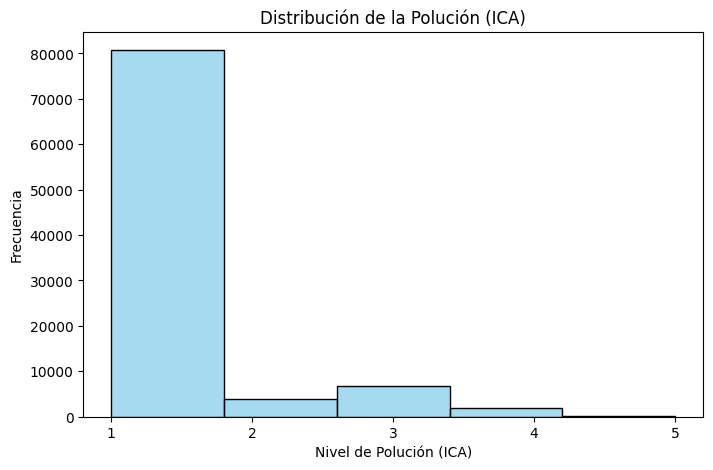

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histograma de Polución (ICA)
plt.figure(figsize=(8,5))
sns.histplot(dsProcesar['Polución (ICA)'], bins=5, kde=False, color='skyblue', edgecolor='black')

plt.title("Distribución de la Polución (ICA)")
plt.xlabel("Nivel de Polución (ICA)")
plt.ylabel("Frecuencia")
plt.xticks([1,2,3,4,5])  
plt.show()


## Por este motivo en este caso especifico no podemos medir el rendimiento del modelo por la exactitud de predicciones, toca replantear las metricas de evaluacion:
* matriz de confusion
* f1_macro 
* recall_macro

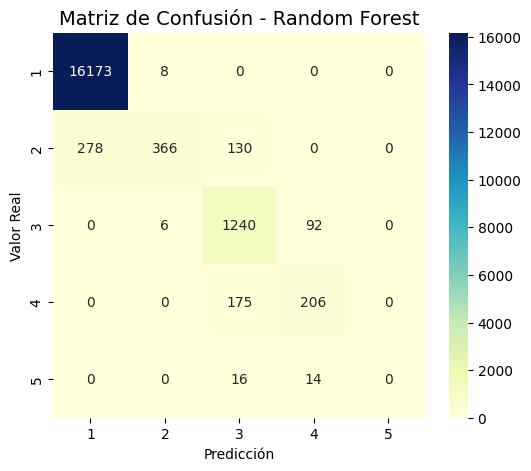

In [135]:
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # Clases ordenadas (1 a 5, por ejemplo)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Random Forest", fontsize=14)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

* Clases 1 y 3 son predichas bastante bien.

* Clases 2, 4 al ser clases intermedias (bajo, alto), tienden a confundirlas o con muy bajo, medio en caso de bajo o medio en el caso de alto 

* Clase 5 es prácticamente imposible de predecir con los datos actuales. debido a que son pocos los casos en los que los sensores han identificado contaminacion de aire muy alta

* Lo que se puede concluir que los sensores ambientales detectan en la ciudad de ibague la contaminacion del aire o muy baja o media,

In [138]:
from sklearn.metrics import f1_score, recall_score, classification_report

# Predicciones del modelo
y_pred = best_model.predict(X_test)

# Convertir a enteros si el modelo es regressor (opcional)
# y_pred = np.round(y_pred).astype(int)

# Métricas macro
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

print("Métricas macro (todas las clases por igual):")
print(f"F1-macro   : {f1:.4f}")
print(f"Recall-macro: {recall:.4f}\n")

# Reporte completo por clase
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))


Métricas macro (todas las clases por igual):
F1-macro   : 0.6151
Recall-macro: 0.5880

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     16181
           2       0.96      0.47      0.63       774
           3       0.79      0.93      0.86      1338
           4       0.66      0.54      0.59       381
           5       0.00      0.00      0.00        30

    accuracy                           0.96     18704
   macro avg       0.68      0.59      0.62     18704
weighted avg       0.96      0.96      0.96     18704



* F1 macro trata a todas las clases por igual sin importar que tan frecuente sea una clasificacion en el dataset 
* Obtuvo un valor de 0.61 lo que significa que el modelo tiene un desempeño aceptable pero realmente se le dificulta en predecir las clases que no son tan frecuentes 
* Recall - macro: mide la sensibilidad de las clases
* El 0.58 de resultado nos indica que por cada categoria acerta la mitad de los datos, tambien sufre de confusion en categorias mas centrales como contaminacion del aire baja las confunde o con muy baja o con medio 
* El modelo aprende bien, el problema es el desvalanceo que hay entre las categorias alto o muy alto, lo que indica que la calidad del aire en ibague es buena para los seres vivos

## VOLVEMOS A APLICAR RANDOM FOREST PERO ASIGNANDOLE MAS PESO A LAS CATEGORIAS CON MENOR CANTIDAD DE DATOS (ALTO MUY ALTO)

In [ ]:
# ---------- 0. Librerías ----------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score
import joblib

# ---------- 1. Definir X, y ----------
TARGET = 'Polución (ICA)'

X = dsProcesar.drop(columns=[TARGET])
y = dsProcesar[TARGET]

# ---------- 2. Dividir datos ----------
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# ---------- 3. Entrenar Random Forest balanceado ----------
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    class_weight='balanced', # EN ESTA LINEA BALANCEAMOS EL PESO DE LAS CLASES
    n_jobs=-1 
)

rf_balanced.fit(X_train, y_train)

# ---------- 4. Evaluar modelo ----------
y_pred = rf_balanced.predict(X_test)

# Métricas macro
f1_macro = f1_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-macro: {f1_macro:.4f}")
print(f"Recall-macro: {recall_macro:.4f}")

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# ---------- 5. Guardar modelo para predicción futura ----------
joblib.dump(rf_balanced, 'randomForestBalanced.joblib')
print("Modelo guardado en 'randomForestBalanced.joblib'.")

# ---------- 6. Ejemplo de predicción ----------
example = {
    'Temperatura (°)': 3.0,
    'Humedad (%)': 4.0,
    'CO2 (PPM)': 4.0,
    'NO2 (PPM)': 5.0,
    'Zona_Arbol Solar Juntas': 0,
    'Zona_Arbol Solar Parque Villa Restrepo': 1,
    'Zona_Arbol Solar Parque Ricaurte': 0,
    'Zona_Arbol Solar Skate Park': 0
}

example_df = pd.DataFrame([example])
pred = rf_balanced.predict(example_df)
print("Predicción ejemplo:", pred[0])


Accuracy: 0.9325
F1-macro: 0.6036
Recall-macro: 0.7553

Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     16150
           2       0.63      0.83      0.71       777
           3       0.87      0.54      0.67      1341
           4       0.37      0.67      0.47       394
           5       0.10      0.76      0.17        42

    accuracy                           0.93     18704
   macro avg       0.59      0.76      0.60     18704
weighted avg       0.96      0.93      0.94     18704

Modelo guardado en 'randomForestBalanced.joblib'.
Predicción ejemplo: 2


* La precision bajo de 0.96 a 0.93 era de esperarse por que deja de enfocarse en la clase dominante (muy bajo) para enforcarse en las que tienen menor concurrencia de datos (alto, muy alto)
* El F1 macro paso de 0.61 a 0.60, lo que indica que el modelo es aceptable y confiable 
* Recall macro subio de 0.58 a 0.75 lo que significa que ya no se confunde tanto a diferencia con el anterior modelo 
* Lo que siginifica que este modelo es mas representativo para las categorias menos frecuentes (alto, muy alto)

## Seguimos buscando como mejorar el modelo para las clases menos frecuentes (contaminacion del aire alta y muy alta)
* Usar OverSlamping con SMOTE
* El término oversampling se refiere a incrementar el número de ejemplos de la clase minoritaria.
* Usarla con SMOTE ayuda a crear ejemplos sintéticos nuevos, más variados, evitando sobreajuste que podría aparecer al duplicar datos.

In [140]:
# ---------- 0. Librerías ----------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE  # ✅ para oversampling
import joblib

# ---------- 1. Definir X, y ----------
TARGET = 'Polución (ICA)'

X = dsProcesar.drop(columns=[TARGET])
y = dsProcesar[TARGET]

# ---------- 2. Dividir datos ----------
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# ---------- 3. Aplicar SMOTE solo al set de entrenamiento ----------
smote = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución original de clases (train):")
print(y_train.value_counts())
print("\nDistribución después de SMOTE (train):")
print(y_train_res.value_counts())

# ---------- 4. Entrenar Random Forest ----------
rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_smote.fit(X_train_res, y_train_res)

# ---------- 5. Evaluar modelo ----------
y_pred = rf_smote.predict(X_test)

f1_macro = f1_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1-macro: {f1_macro:.4f}")
print(f"Recall-macro: {recall_macro:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# ---------- 6. Guardar modelo ----------
joblib.dump(rf_smote, 'randomforest_smote.joblib')
print("Modelo guardado en 'randomforest_smote.joblib'.")

# ---------- 7. Ejemplo de predicción ----------
example = {
    'Temperatura (°)': 3.0,
    'Humedad (%)': 4.0,
    'CO2 (PPM)': 4.0,
    'NO2 (PPM)': 5.0,
    'Zona_Arbol Solar Juntas': 0,
    'Zona_Arbol Solar Parque Villa Restrepo': 1,
    'Zona_Arbol Solar Parque Ricaurte': 0,
    'Zona_Arbol Solar Skate Park': 0
}

example_df = pd.DataFrame([example])
pred = rf_smote.predict(example_df)
print("Predicción ejemplo:", pred[0])


Distribución original de clases (train):
Polución (ICA)
1    64600
3     5363
2     3106
4     1576
5      171
Name: count, dtype: int64

Distribución después de SMOTE (train):
Polución (ICA)
1    64600
2    64600
3    64600
4    64600
5    64600
Name: count, dtype: int64

Accuracy: 0.9325
F1-macro: 0.6036
Recall-macro: 0.7553

Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     16150
           2       0.63      0.83      0.71       777
           3       0.87      0.54      0.67      1341
           4       0.37      0.67      0.47       394
           5       0.10      0.76      0.17        42

    accuracy                           0.93     18704
   macro avg       0.59      0.76      0.60     18704
weighted avg       0.96      0.93      0.94     18704

Modelo guardado en 'randomforest_smote.joblib'.
Predicción ejemplo: 2


* Los resultados son los mismos en comparacion al entrenamiento con randomForestBalanceado debido a que al balancear las clases ya se compensa este problema 
* La diferencia radica en que el entrenamiento del randomForest con SMOTE creo ejemplos sinteticos y no reales para poder compensar el problema, lo que demuestra un comportamiento del modelo y resultados consistentes

* DE ESTA MANERA DEMUESTRO QUE EL PROBLEMA NO RADICA EN EL PROCESO NI EN EL MODELO, SI NO EN QUE LOS SENSORES AMBIENTALES EN LA CIUDAD DE IBAGUE NO SON CAPACES DE CAPTAR ALTAS CONTAMINACIONES DE AIRE LIMITANDO LA PREDICCION DE ESTAS CATEGORIAS